In [2]:
import pandas as pd 


In [26]:
df_googlebooks1= pd.read_csv('google_books_1299.csv', header=0, delimiter=',')

In [27]:
df_googlebooks1.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [106]:
len(df_googlebooks1)

725

In [28]:
df_googlebooks1.isna().sum()

Unnamed: 0         0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

In [29]:
df_googlebooks1.columns

Index(['Unnamed: 0', 'title', 'author', 'rating', 'voters', 'price',
       'currency', 'description', 'publisher', 'page_count', 'generes', 'ISBN',
       'language', 'published_date'],
      dtype='object')

In [30]:
df_googlebooks1.dtypes

Unnamed: 0          int64
title              object
author             object
rating            float64
voters             object
price             float64
currency           object
description        object
publisher          object
page_count          int64
generes            object
ISBN               object
language           object
published_date     object
dtype: object

In [31]:
#Drop missing values in the ratings column as those are relevant for our project
df_googlebooks1 = df_googlebooks1.dropna(subset=["rating"])
df_googlebooks1.isna().sum()

Unnamed: 0        0
title             0
author            0
rating            0
voters            0
price             0
currency          0
description       3
publisher         0
page_count        0
generes           0
ISBN              0
language          0
published_date    0
dtype: int64

In [32]:
df_googlebooks1.groupby(['rating']).size()

rating
2.5     11
3.3      8
3.5      9
3.6      4
3.7     17
3.8     32
3.9     29
4.0    105
4.1     62
4.2     53
4.3    101
4.4    109
4.5    175
4.6    163
4.7    139
4.8     79
4.9     20
5.0    108
dtype: int64

Ratings range from 2.5 to 5.0. This is checked by the groupby.size() function.

In [33]:
#checking how many genres there are
df_googlebooks1.groupby(['generes']).size()

generes
Art , Popular Culture                                                    1
Art , Video Game Art                                                     1
Biography &amp, Autobiography , Business                                 1
Biography &amp, Autobiography , Entertainment &amp, Performing Arts      2
Biography &amp, Autobiography , Environmentalists &amp, Naturalists      1
                                                                      ... 
Young Adult Fiction , Fantasy , Dark Fantasy                             1
Young Adult Fiction , Fantasy , Epic                                     2
Young Adult Fiction , Humorous , General                                 1
Young Adult Fiction , Science Fiction , Alien Contact                    1
none                                                                   499
Length: 226, dtype: int64

In [34]:
df_googlebooks1.drop(df_googlebooks1[df_googlebooks1['generes'] == "none"].index, inplace = True)
df_googlebooks1.groupby(["generes"]).size()

generes
Art , Popular Culture                                                  1
Art , Video Game Art                                                   1
Biography &amp, Autobiography , Business                               1
Biography &amp, Autobiography , Entertainment &amp, Performing Arts    2
Biography &amp, Autobiography , Environmentalists &amp, Naturalists    1
                                                                      ..
Young Adult Fiction , Family , General                                 1
Young Adult Fiction , Fantasy , Dark Fantasy                           1
Young Adult Fiction , Fantasy , Epic                                   2
Young Adult Fiction , Humorous , General                               1
Young Adult Fiction , Science Fiction , Alien Contact                  1
Length: 225, dtype: int64

https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/

In [35]:
df_googlebooks1["generes"].astype("string")

1       Fiction , Mystery &amp, Detective , Cozy , Gen...
2         Games &amp, Activities , Video &amp, Electronic
4                        Fiction , Fantasy , Dark Fantasy
6                                  Fiction , Media Tie-In
7                                Fiction , Fantasy , Epic
                              ...                        
1287                                     Fiction , Horror
1289            Self-Help , Personal Growth , Self-Esteem
1294                       Medical , Health Care Delivery
1295    Psychology , Cognitive Psychology &amp, Cognition
1298                       Fiction , Thrillers , Suspense
Name: generes, Length: 725, dtype: string

In [38]:
df_googlebooks1["generes"].str.split(" , ", -1)

1       [Fiction, Mystery &amp, Detective, Cozy, General]
2        [Games &amp, Activities, Video &amp, Electronic]
4                        [Fiction, Fantasy, Dark Fantasy]
6                                 [Fiction, Media Tie-In]
7                                [Fiction, Fantasy, Epic]
                              ...                        
1287                                    [Fiction, Horror]
1289            [Self-Help, Personal Growth, Self-Esteem]
1294                      [Medical, Health Care Delivery]
1295    [Psychology, Cognitive Psychology &amp, Cognit...
1298                       [Fiction, Thrillers, Suspense]
Name: generes, Length: 725, dtype: object

In [47]:
import ast
from ast import literal_eval

In [58]:
for i, l in enumerate(df_googlebooks1["generes"]):
    print("list",i,"is",type(l))

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'str'>
list 11 is <class 'str'>
list 12 is <class 'str'>
list 13 is <class 'str'>
list 14 is <class 'str'>
list 15 is <class 'str'>
list 16 is <class 'str'>
list 17 is <class 'str'>
list 18 is <class 'str'>
list 19 is <class 'str'>
list 20 is <class 'str'>
list 21 is <class 'str'>
list 22 is <class 'str'>
list 23 is <class 'str'>
list 24 is <class 'str'>
list 25 is <class 'str'>
list 26 is <class 'str'>
list 27 is <class 'str'>
list 28 is <class 'str'>
list 29 is <class 'str'>
list 30 is <class 'str'>
list 31 is <class 'str'>
list 32 is <class 'str'>
list 33 is <class 'str'>
list 34 is <class 'str'>
list 35 is <class 'str'>
list 36 is <class 'str'>
list 37 is <class 'str'>
list 38 is <class 'str'>
list 39 is <class 'str'>
list 40 is

In [89]:
df_googlebooks1["generes"].value_counts()

Fiction , Thrillers , Suspense                                 33
Fiction , Fantasy , Epic                                       33
Comics &amp, Graphic Novels , Superheroes                      30
Fiction , Mystery &amp, Detective , General                    21
Fiction , Fantasy , Action &amp, Adventure                     18
                                                               ..
Computers , System Administration , Storage &amp, Retrieval     1
Business &amp, Economics , Training                             1
Computers , Electronic Commerce                                 1
Business &amp, Economics , Management Science                   1
Medical , Health Care Delivery                                  1
Name: generes, Length: 225, dtype: int64

In [96]:
type(df_googlebooks1["generes"])

pandas.core.series.Series

In [110]:
genres_list=[]
for j in df_googlebooks1["generes"]:
    genres_list.append[j]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [111]:
df_googlebooks1["rating"].describe()

count    725.000000
mean       4.420966
std        0.416579
min        2.500000
25%        4.200000
50%        4.500000
75%        4.700000
max        5.000000
Name: rating, dtype: float64

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='Count'>

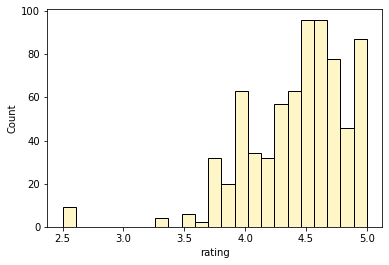

In [113]:
#with seaborn
sns.set_palette("YlOrBr")#setting a colour palette
sns.histplot(data=df_googlebooks1, x='rating')